## Evaluating Regression Models

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

#### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [18]:
# create our linear regression model and fit it
model = LinearRegression().fit(tips[['total_bill']], tips[['tip']])

# create our prediction column (prediction of tips)
tips['yhat'] = model.predict(tips[['total_bill']])

In [ ]:
# create a baseline column, our baseline is the average of our y target
tips['baseline'] = tips.tip.mean()

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


#### 3. Plot the residuals for the linear regression model that you made.

In [19]:
# create a residual column
tips['residual'] = tips['yhat'] - tips['tip']

# create a residual baseline column
tips['residual_baseline'] = tips['baseline'] - tips['tip']

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,-0.107178,-0.611721


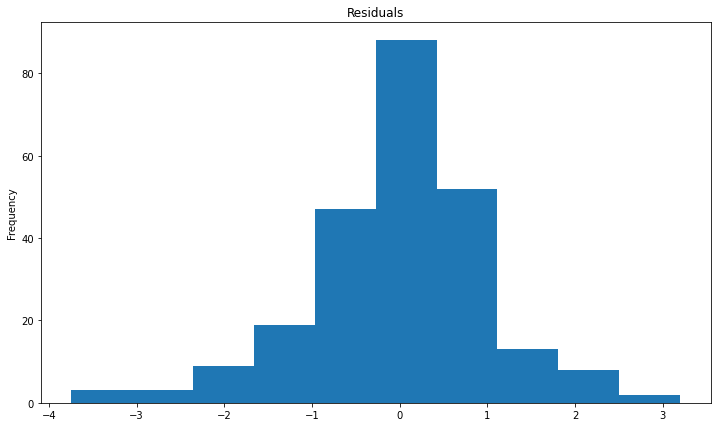

In [24]:
# plot my residuals
plt.figure(figsize=(12,7))
tips.residual.plot.hist()
plt.title('Residuals')
plt.show()

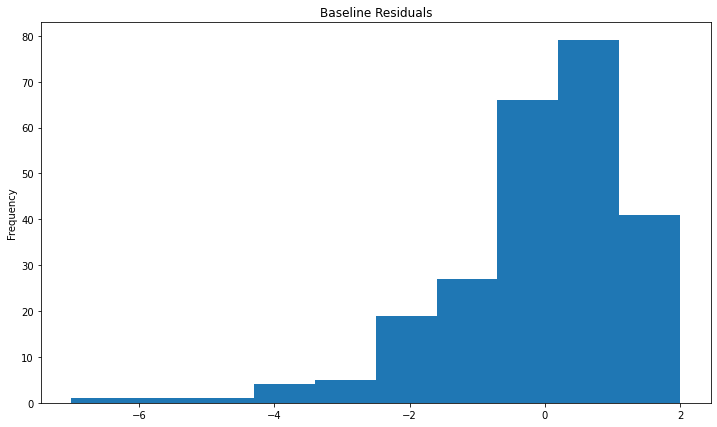

In [26]:
# plot my baseline residuals
plt.figure(figsize=(12,7))
tips.residual_baseline.plot.hist()
plt.title('Baseline Residuals')
plt.show()

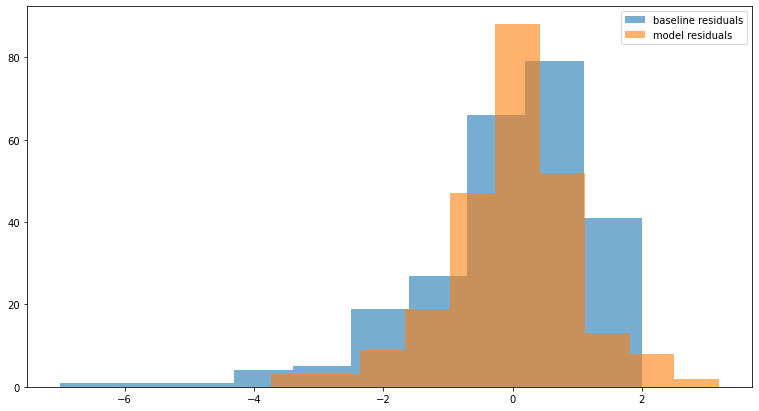

In [32]:
fig, ax = plt.subplots(figsize=(13,7))

ax.hist(tips.residual_baseline, label='baseline residuals', alpha=.6) # alpha=transparancy
ax.hist(tips.residual, label='model residuals', alpha=.6)
ax.legend()

plt.show()

#### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [34]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721


In [36]:
# sum of squared errors aka SSE

# first create a column for residual^2
tips['residual^2'] = tips.residual ** 2

# then create a column for residual_baseline^2
tips['residual_baseline^2'] = tips.residual_baseline ** 2

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,residual_baseline,residual^2,residual_baseline^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724


In [37]:
# now onto SSE
SSE = sum(tips['residual^2'])
SSE_baseline = sum(tips['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE - baseline =  465.21247704918085


Here we see our model is performing better than our baseline.

In [38]:
# now compute Mean Squared Error (MSE) by using SSE
MSE = SSE/len(tips)
MSE_baseline = SSE_baseline/len(tips)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.0360194420113769
MSE baseline =  1.9066085124966428


The model is performing slightly better than the baseline.

In [39]:
# now compute Room Mean Squared Error (RMSE)
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


The model is off by 1.02 while the baseline is off by 1.38. The model is still performing better than having no model. 

#### Now using sklearn methods to compute all the above